In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline

In [3]:
ames = pd.read_csv('cleaned.csv')
test = pd.read_csv('cleaned_test.csv')

In [4]:
ames.drop(columns=('Unnamed: 0'), inplace = True)
test.drop(columns=('Unnamed: 0'), inplace = True)

In [5]:
#filter out outliers for numeric columns
df = ['Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
    'Garage Cars', 'Garage Area', 'SalePrice'  
        ]
df = ames[df]

for col in df.columns:
    mean = np.mean(df[col])
    std = np.std(df[col])
    thres = mean + std*3.9
    df = df[(df[col] <= thres) & (df[col] >= -1*thres)]

In [6]:
def plots(col):
    """
    Generates subplots showing distribution of col, Log(col) vs Sale Price and Col vs sale price at orders 1, 2, and 3
    """
    fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12,20)) 
    sns.distplot(df[col],ax=ax[0])
    sns.regplot(df[col],df['SalePrice'], ax=ax[1]) 
    sns.regplot(df[col],df['SalePrice'], ax=ax[2], logx=True)
    sns.regplot(df[col],df['SalePrice'], ax=ax[3], order=2)
    sns.regplot(df[col],df['SalePrice'], ax=ax[4], order=3)


In [7]:
def better_corr(corr, base):
    """
    Returns true if corr shows a better correlation than base
    """
    if (corr < np.abs(base)) and (corr > -1*np.abs(base)):
        return False
    else:
        return True

In [8]:
def get_interactions(main):
    """
    Prints all interactions between main and numeric vairables in df that have a higher correlation with sale price than
    the to individual variables
    """
    base1 = df[[main]].corrwith(df['SalePrice'])
    for col in df.columns:
        if col != main:
            base2 = df[[col]].corrwith(df['SalePrice'])
            df[f'{main} * {col}'] = df[main] * df[col]
            cor = df[[f'{main} * {col}']].corrwith(df['SalePrice'])
            if (better_corr(cor[0], base1[0])) and (better_corr(cor[0], base2[0])):
                print(f'{main} * {col}')
    
    

C:\Users\steph\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


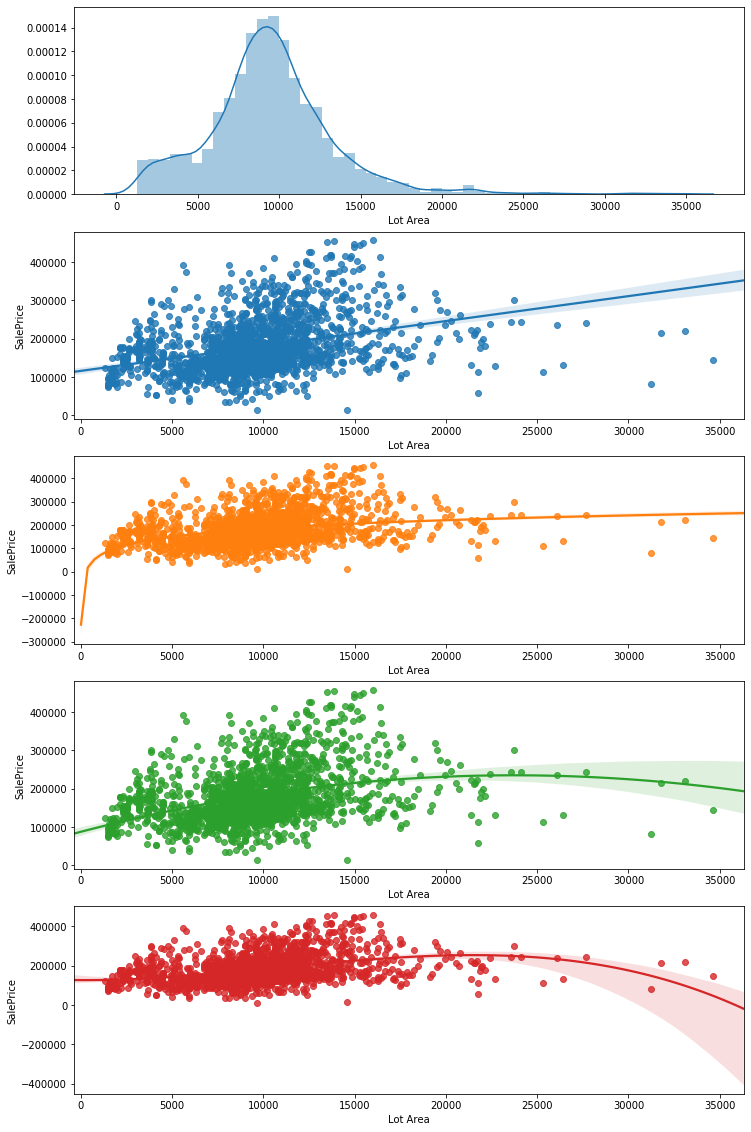

In [13]:
# went through plots of all variables, results not in jupyter notebook for conciseness
plots('Lot Area')

Some of the more useful interactions that i tried, get_interations function was used to determine which ones to test

1st Flr SF * Most Recent    0.668299
dtype: float64


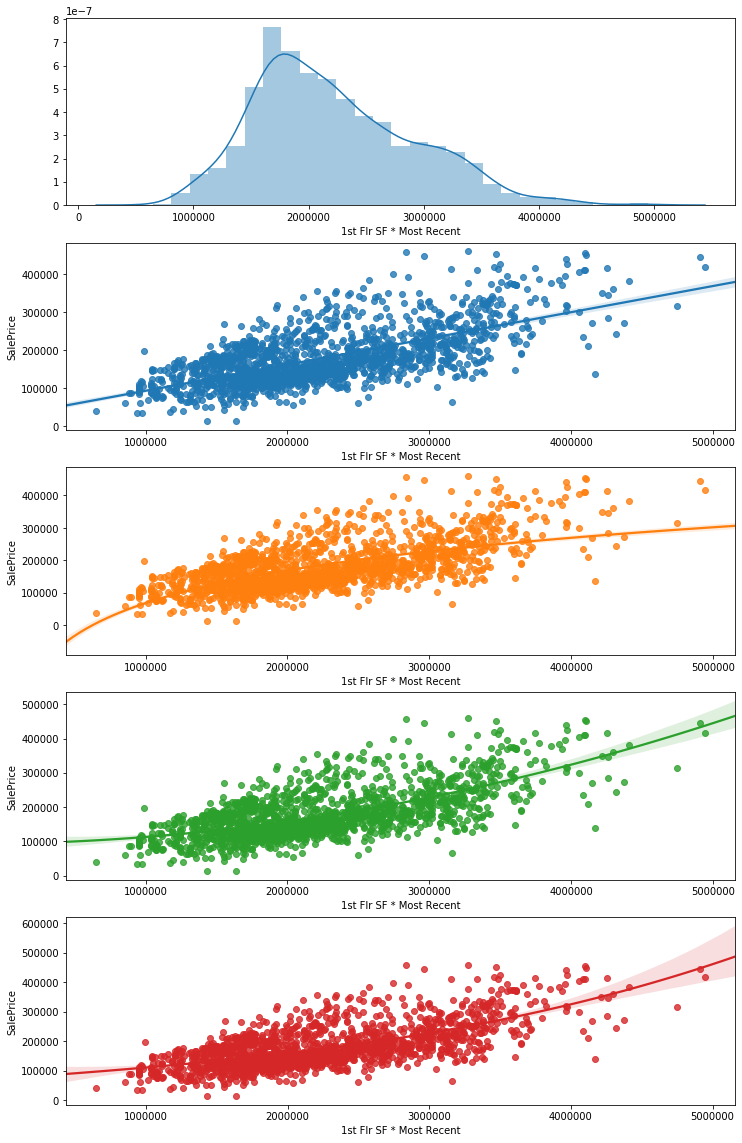

In [237]:
# 1st Flr SF * Gr Liv Area   1 log
# 1st Flr SF * Full Bath     maybe
# 1st Flr SF * Kitchen AbvGr 1 log
# 1st Flr SF * TotRms AbvGrd 1 log
# 1st Flr SF * Garage Yr Blt 1 2 maybe ind
# 1st Flr SF * Garage Cars    1 ind
# 1st Flr SF * Garage Area    1 ind
# 1st Flr SF * Most Recent    1 log

col = '1st Flr SF * Most Recent'
print(df[[col]].corrwith(df['SalePrice']))
plots(col)

Total Bsmt SF * Most Recent    0.680735
dtype: float64


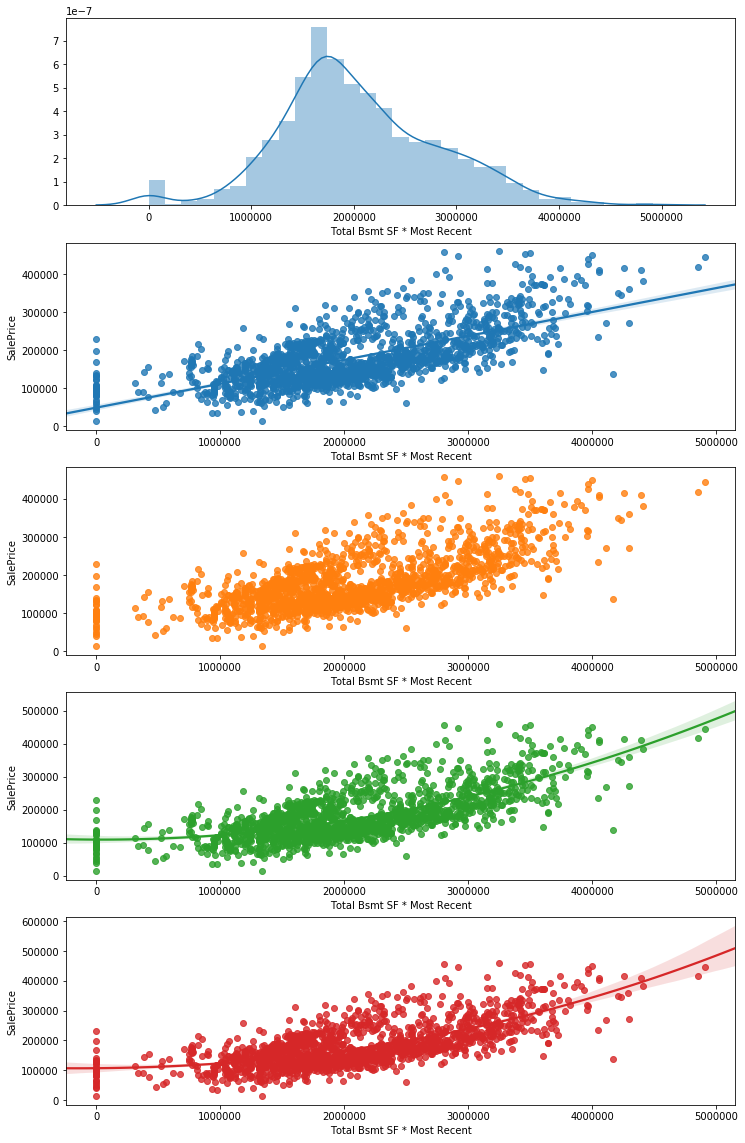

In [227]:
# Total Bsmt SF * 1st Flr SF     1
# Total Bsmt SF * Gr Liv Area    1 ind
# Total Bsmt SF * Full Bath      1 3
# Total Bsmt SF * Kitchen AbvGr  1 maybe
# Total Bsmt SF * TotRms AbvGrd  1
# Total Bsmt SF * Garage Yr Blt  1 2 3 maybe
# Total Bsmt SF * Garage Cars    1    Used
# Total Bsmt SF * Garage Area    1
# Total Bsmt SF * Most Recent    1 2

col = 'Total Bsmt SF * Most Recent'
print(df[[col]].corrwith(df['SalePrice']))
plots(col)

Bsmt Unf SF * Wood Deck SF    0.357699
dtype: float64


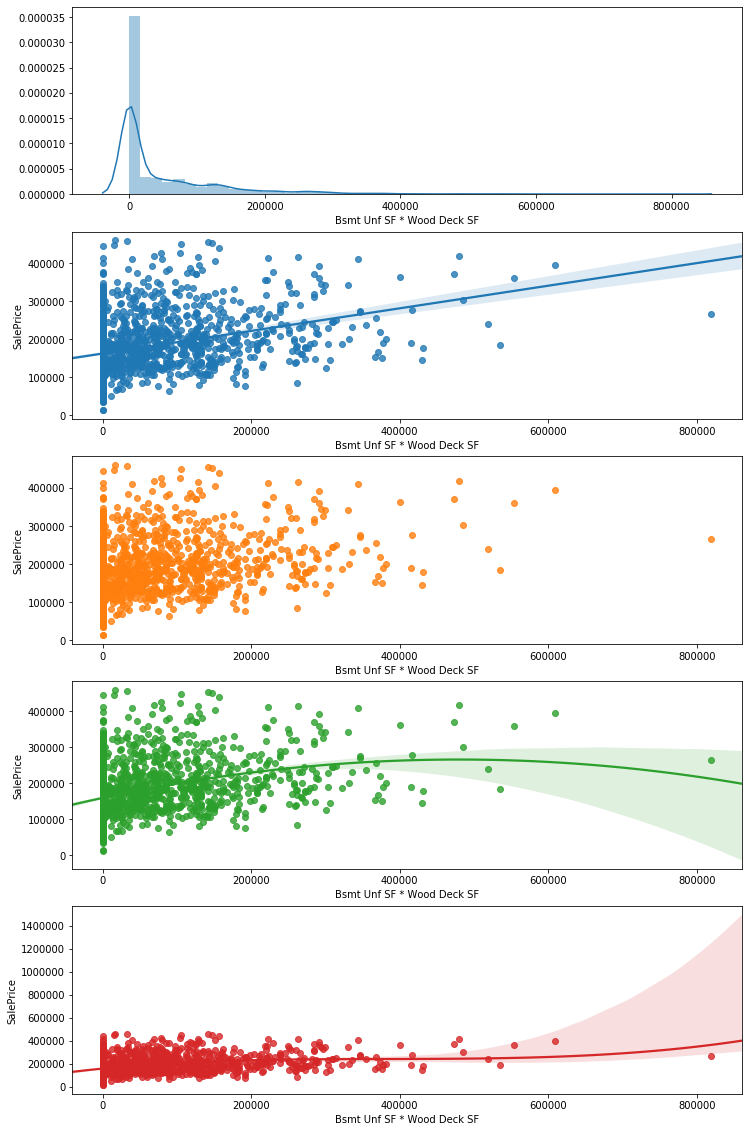

In [216]:
# Bsmt Unf SF * Bsmt Full Bath  NO
# Bsmt Unf SF * Bedroom AbvGr  ind maybe 1 2
# Bsmt Unf SF * Kitchen AbvGr  inf maybe 2
# Bsmt Unf SF * Wood Deck SF   NO

col = 'Bsmt Unf SF * Wood Deck SF'
print(df[[col]].corrwith(df['SalePrice']))
plots(col)

Year Built * Gr Liv Area    0.771525
dtype: float64


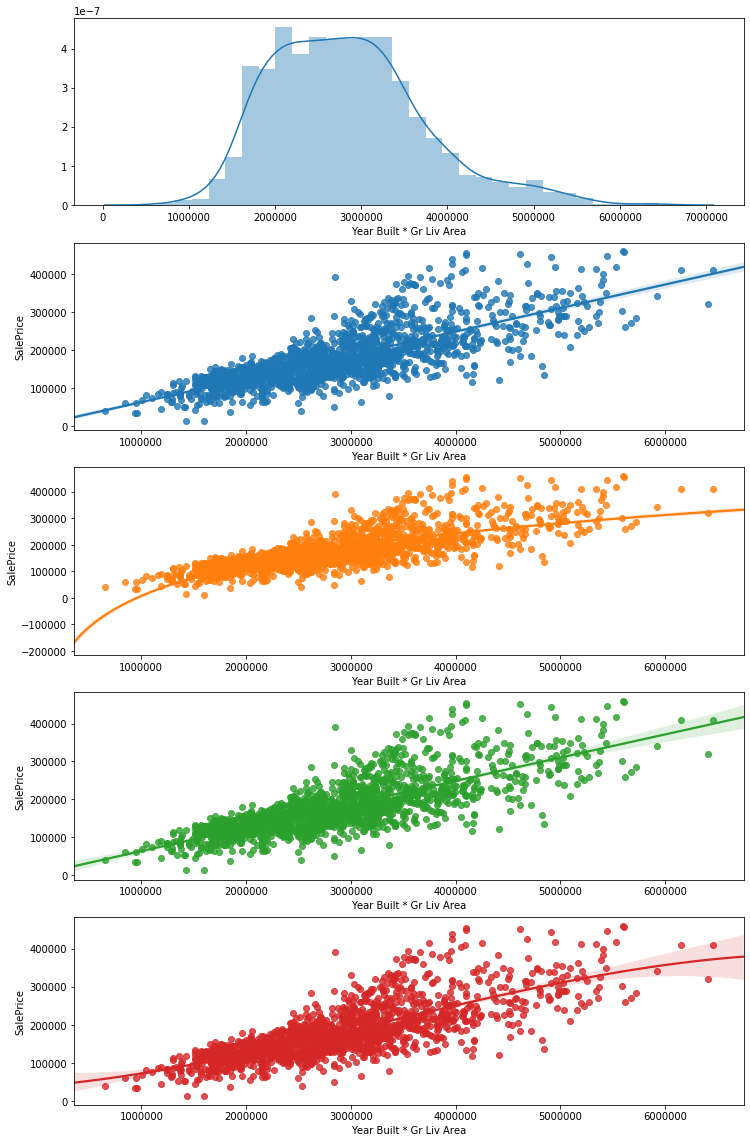

In [173]:
# Year Built * Year Remod/Add    2
# Year Built * Total Bsmt SF     2
# Year Built * 1st Flr SF        1 log
# Year Built * Gr Liv Area       1 log
# Year Built * Kitchen AbvGr     2
# Year Built * TotRms AbvGrd     Nope
# Year Built * Garage Cars       Maybe 1 2
# Year Built * Garage Area       1
# Year Built * Most Recent       2

col = 'Year Built * Gr Liv Area'
print(df[[col]].corrwith(df['SalePrice']))
plots(col)

In [ ]:
# Lot Area * Lot Frontage    log, 1
# Lot Area * Mas Vnr Area    .56, 1 Used
# Lot Area * BsmtFin SF 1    1
# Lot Area * Full Bath       1       Used
# Lot Area * Half Bath       Nope
# Lot Area * Bedroom AbvGr   1
# Lot Area * Kitchen AbvGr   log
# Lot Area * Fireplaces      1      Used
# Lot Area * Garage Yr Blt   Nope
# Lot Area * Wood Deck SF    Nope
# Lot Area * Open Porch SF   1 maybe
# Lot Area * Pool Area       Nope

col = 'Lot Area * Mas Vnr Area'
print(df[[col]].corrwith(df['SalePrice']))
plots(col)